In [187]:
#importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [188]:
#importing data
df = pd.read_csv('Churn Modeling.csv')

In [189]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [191]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [192]:
#looking at churns / not churns. 1=churn, 0= not churn
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [193]:
#thought the difference between highest and lowest estimated salary was a bit peculiar. looking into
df.EstimatedSalary.nsmallest(20)

2362     11.58
9647     90.07
9010     91.75
5548     96.27
4989    106.67
7565    123.07
2498    142.81
8722    143.34
4774    178.19
1451    216.27
1462    236.45
3446    247.36
8502    287.99
9649    332.81
2046    343.38
396     371.05
393     417.41
5675    428.23
5120    440.20
925     447.73
Name: EstimatedSalary, dtype: float64

In [194]:
df.EstimatedSalary.nlargest(10)

6646    199992.48
3580    199970.74
4417    199953.33
9096    199929.17
8926    199909.32
5958    199862.75
1378    199857.47
6402    199841.32
8088    199808.10
6125    199805.63
Name: EstimatedSalary, dtype: float64

In [195]:
#looking at the 4 lowest salaries. keeping them for now
df.iloc[[2362, 9647, 9010, 5548]]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2362,2363,15791053,Lucciano,709,Germany,Male,45,4,122917.71,1,1,1,11.58,1
9647,9648,15679693,Walker,625,France,Male,31,5,0.00,2,0,1,90.07,0
9010,9011,15786463,Hsing,645,Germany,Female,59,8,121669.93,2,0,0,91.75,1
5548,5549,15639662,Phillips,710,France,Male,38,2,0.00,2,1,0,96.27,0


In [196]:
#dropping columns
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

### Some light EDA

0    7963
1    2037
Name: Exited, dtype: int64


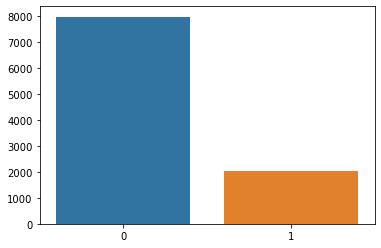

In [197]:
#looking at distribution of churns/not churns
a = df['Exited'].value_counts()
sns.barplot(a.index, a.values)
print(a)

0    0.7963
1    0.2037
Name: Exited, dtype: float64


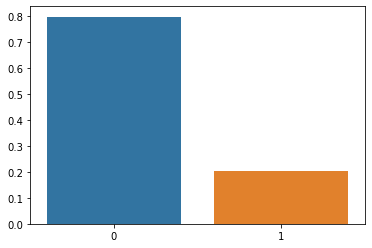

In [198]:
#looking at distribution of churns/not churns as percentage
a = df['Exited'].value_counts(normalize=True)
sns.barplot(a.index, a.values)
print(a)

Male      5457
Female    4543
Name: Gender, dtype: int64


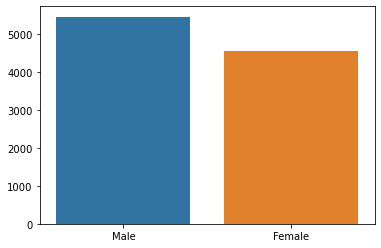

In [199]:
#looking at distribution of gender
a = df['Gender'].value_counts()
sns.barplot(a.index, a.values)
print(a)

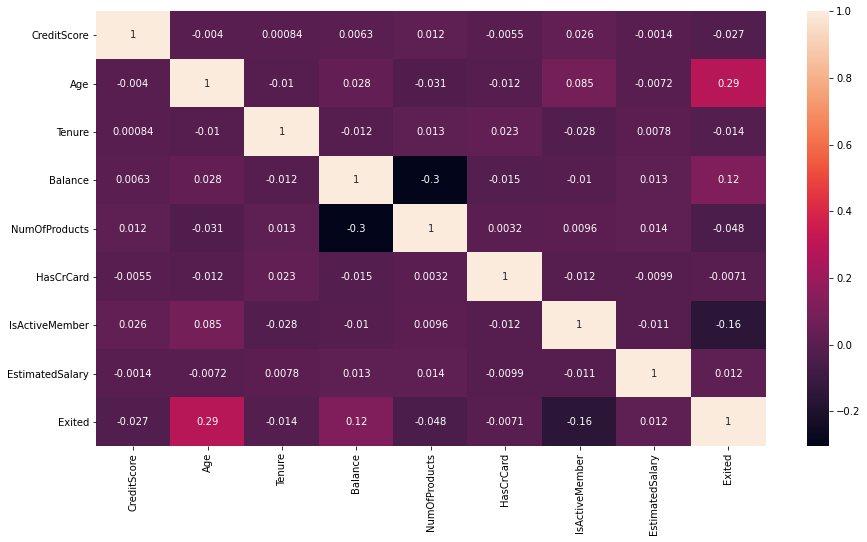

In [202]:
#heatplot of correlations
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)

### Data transformation

In [203]:
# making gender column binary. female is 0, male is 1
dct = {'Female':0, 'Male':1}
df.Gender = df.Gender.map(dct)

In [204]:
#making an age category by agegroups, under 30, between 30&50, between 50&70 and over 70
def age_cat(df):
    if (df.Age <= 30):
        return 'young'
    elif (df.Age > 30) & (df.Age <= 50):
        return 'adult'
    elif (df.Age > 50) & (df.Age <= 70):
        return 'older'
    elif (df.Age > 70):
        return 'elderly'

In [205]:
#applying age categories to df
df['age_group'] = df.apply(lambda df: age_cat(df), axis=1)

In [206]:
#dropping age column
df.drop(columns='Age', inplace=True)

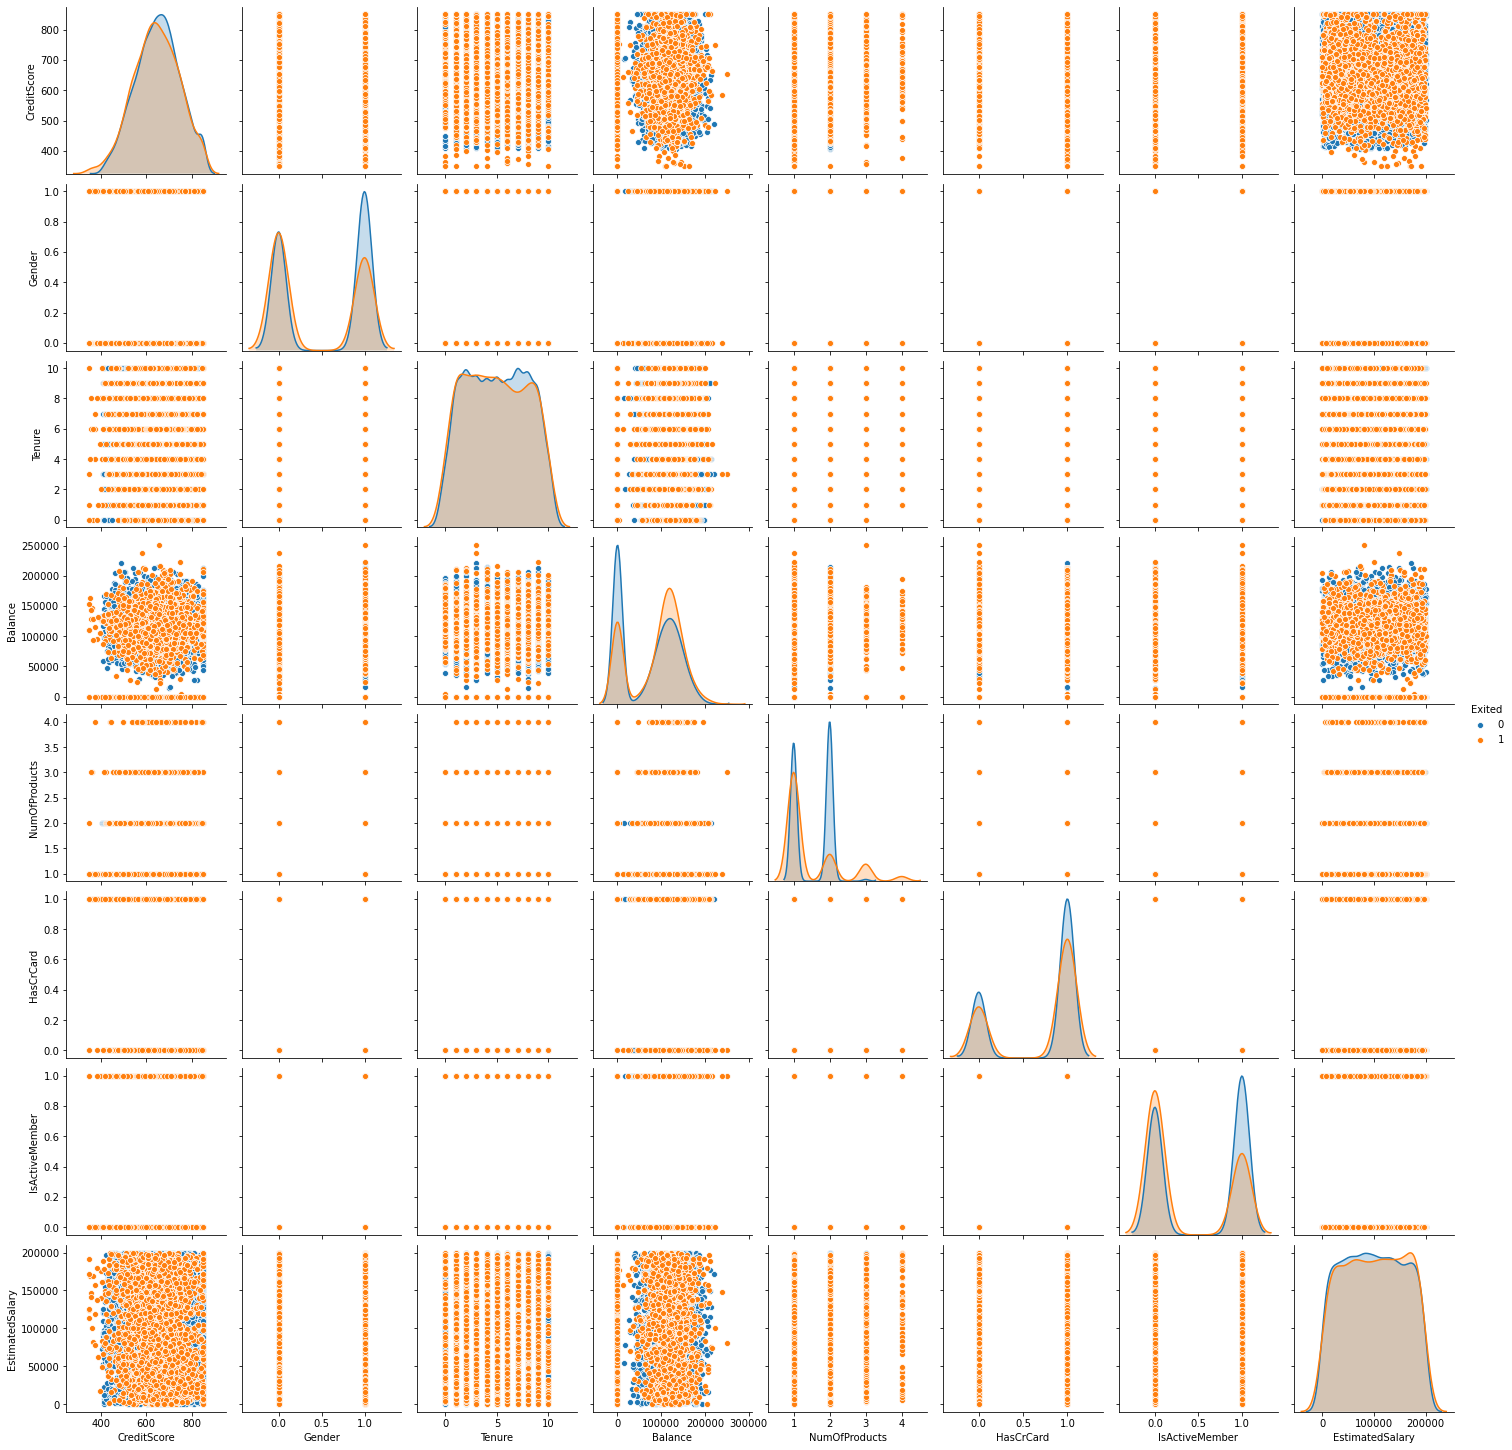

In [207]:
sns.pairplot(df, hue='Exited')

In [210]:
#getting dummies for geography
df = pd.get_dummies(data=df, columns=['Geography'], drop_first=True)

In [212]:
#getting dummies for age_group
df = pd.get_dummies(data=df, columns=['age_group'], drop_first=True)

In [213]:
#checking new columns/dummies
df.head()

,CreditScore,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,age_group_elderly,age_group_older,age_group_young
0,619,0,2,0.00,1,1,1,101348.88,1,0,0,0,0,0
1,608,0,1,83807.86,1,0,1,112542.58,0,0,1,0,0,0
2,502,0,8,159660.80,3,1,0,113931.57,1,0,0,0,0,0
3,699,0,1,0.00,2,0,0,93826.63,0,0,0,0,0,0
4,850,0,2,125510.82,1,1,1,79084.10,0,0,1,0,0,0


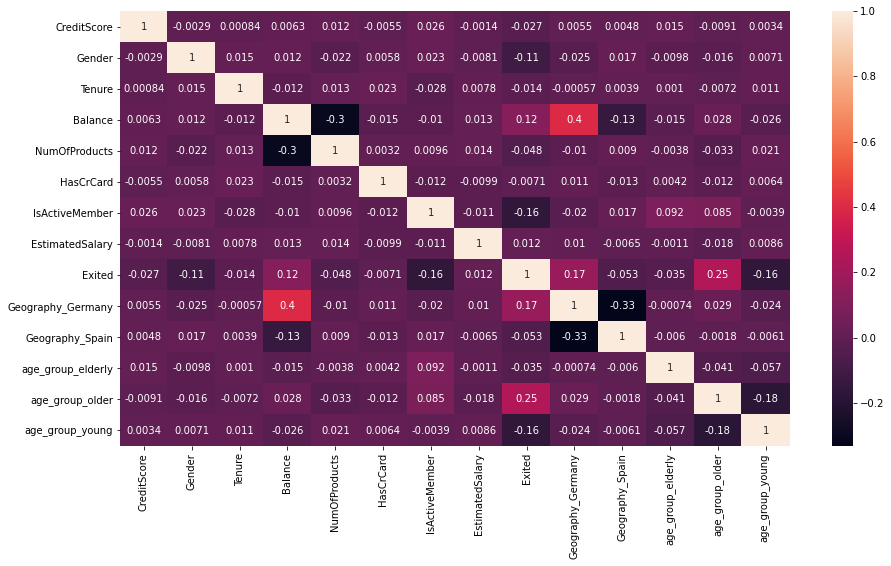

In [214]:
#looking at correlations again in heatmap
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  age_group_elderly  10000 non-null  uint8  
 12  age_group_older    10000 non-null  uint8  
 13  age_group_young    10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(5)
memory usage: 752.1 KB


In [236]:
from sklearn.preprocessing import StandardScaler

In [239]:
#scaling numeric variables that are not binary
col_names = ['CreditScore', 'Tenure', 'Balance', 'NumOfProducts','EstimatedSalary']
features = df[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [240]:
#making that change in the df
df[col_names] = features

In [241]:
df

,CreditScore,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,age_group_elderly,age_group_older,age_group_young
0,-0.326221,0,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,0,0,0,0,0
1,-0.440036,0,-1.387538,0.117350,-0.911583,0,1,0.216534,0,0,1,0,0,0
2,-1.536794,0,1.032908,1.333053,2.527057,1,0,0.240687,1,0,0,0,0,0
3,0.501521,0,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,0,0,0,0,0
4,2.063884,0,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,1,-0.004426,-1.225848,0.807737,1,0,-0.066419,0,0,0,0,0,0
9996,-1.391939,1,1.724464,-0.306379,-0.911583,1,1,0.027988,0,0,0,0,0,0
9997,0.604988,0,0.687130,-1.225848,-0.911583,0,1,-1.008643,1,0,0,0,0,0
9998,1.256835,1,-0.695982,-0.022608,0.807737,1,0,-0.125231,1,1,0,0,0,0


In [242]:
#getting all columns
df.columns

Index(['CreditScore', 'Gender', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_Germany', 'Geography_Spain', 'age_group_elderly',
       'age_group_older', 'age_group_young'],
      dtype='object')

In [243]:
df = df[['CreditScore', 'Gender', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Geography_Germany', 'Geography_Spain', 'age_group_elderly',
       'age_group_older', 'age_group_young', 'Exited']]

In [244]:
#creating my X and my y
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

### Task is to find the ones prone to churn(exit). We will be particularly interested in false negatives (and of course true negatives). That is; those predicted to stay but they´re actually leaving. A positive in this case (1) is equal to a churn. Thus, recall is of biggest interest.'

In [245]:
#importing test train split
from sklearn.model_selection import train_test_split

In [246]:
#implementing split
X_dev, X_test, y_dev, y_test =train_test_split(X, y, test_size=0.2, random_state=123)

In [247]:
#second split
X_train, X_val, y_train, y_val =train_test_split(X_dev, y_dev, test_size=0.2, random_state=123)

### Models: selection and tuning

In [249]:
# importing ML models, pipeline and gridsearch
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import recall_score

#model selection
classifiers = [
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    SVC(kernel='linear'),
    KNeighborsClassifier(),
    GaussianNB(),
    LogisticRegression(max_iter=4000),
    GradientBoostingClassifier(random_state=42)
]

for classifier in classifiers:
    pipe = make_pipeline(classifier)
    pipe.fit(X_train, y_train)
    print('\n',classifier, pipe.score(X_val, y_val))
    print(' recall:', recall_score(pipe.predict(X_val), y_val))
#my top 3: logreg, randomforest, gradient boosting 


 DecisionTreeClassifier(random_state=42) 0.79125
 recall: 0.4807692307692308

 RandomForestClassifier(random_state=42) 0.845625
 recall: 0.7142857142857143

 SVC(kernel='linear') 0.79875
 recall: 0.0

 KNeighborsClassifier() 0.81875


/Users/ebba/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 recall: 0.5888888888888889

 GaussianNB() 0.779375
 recall: 0.45609065155807366

 LogisticRegression(max_iter=4000) 0.81625
 recall: 0.6590909090909091

 GradientBoostingClassifier(random_state=42) 0.850625
 recall: 0.7985611510791367


In [32]:
from sklearn.metrics import recall_score

In [286]:
#LogReg Classifier
#5-fold crossvalidation
#having tried out different values on hyperparameters fitting took long to run so left only few. 

from sklearn.model_selection import GridSearchCV
classifier = LogisticRegression()

parameters = {'C':[0.1, 0.5, 1], 'tol':[0.0001, 0.0001, 0.001]}
             
            
grid = GridSearchCV(classifier, param_grid=parameters, cv=5, scoring= 'recall') 

In [287]:
#fitting 
grid.fit(X_dev, y_dev)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1], 'tol': [0.0001, 0.0001, 0.001]},
             scoring='recall')

In [288]:
#looking at logreg score
grid.score(X_dev, y_dev)

0.19901417128773877

In [289]:
from sklearn.metrics import confusion_matrix

In [290]:
#looking at best hyper parameter values, classification report and confusion matrix
best = grid.best_estimator_
y_pred = best.predict(X_val)
y_pred1 = best.predict(X_train)

print(best)
print(recall_score(y_pred1, y_train))
print(classification_report(y_pred, y_val))
print(confusion_matrix(y_pred, y_val))

LogisticRegression(C=1)
0.704
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      1513
           1       0.18      0.68      0.29        87

    accuracy                           0.82      1600
   macro avg       0.58      0.75      0.59      1600
weighted avg       0.93      0.82      0.86      1600

[[1250  263]
 [  28   59]]


In [283]:
#Gradient Boosting Classifier
#very slow, reduced values for hyper parameters in gridsearch after trying a few
parameters = [{'loss':['exponential'], 
               'criterion':[  'mse']}]


grid = GridSearchCV(GradientBoostingClassifier(), param_grid=parameters, cv=10) 

In [284]:
#fitting model
grid.fit(X_dev, y_dev)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid=[{'criterion': ['mse'], 'loss': ['exponential']}])

In [285]:
from sklearn.metrics import classification_report 
best = grid.best_estimator_
y_pred = best.predict(X_val)
y_pred1 = best.predict(X_train)

print(best)
print(recall_score(y_pred1, y_train))
print(classification_report(y_pred, y_val))
print(confusion_matrix(y_pred, y_val))

GradientBoostingClassifier(criterion='mse', loss='exponential')
0.8122866894197952
              precision    recall  f1-score   support

           0       0.98      0.86      0.92      1464
           1       0.35      0.84      0.50       136

    accuracy                           0.86      1600
   macro avg       0.67      0.85      0.71      1600
weighted avg       0.93      0.86      0.88      1600

[[1256  208]
 [  22  114]]


In [228]:
#looking at best hyper parameter values, classification report and confusion matrix
from sklearn.metrics import confusion_matrix
y_pred=best.predict(X_test)
print(best)
print(recall_score(y_pred, y_test))
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

GradientBoostingClassifier(criterion='mse', loss='exponential')
0.8421052631578947
              precision    recall  f1-score   support

           0       0.98      0.86      0.92      1810
           1       0.39      0.84      0.53       190

    accuracy                           0.86      2000
   macro avg       0.68      0.85      0.72      2000
weighted avg       0.92      0.86      0.88      2000

[[1556  254]
 [  30  160]]


In [291]:
#Random Forest Classifier
#performing gridseach and crossvalidation
classifier = RandomForestClassifier(random_state=4)

parameters = [{'criterion':['entropy', 'gini'], 
               'max_depth': [ 19,20,22, 21],
              'n_estimators': [100, 10],
              'max_features':['sqrt', 'auto', 'log2']}]

grid = GridSearchCV(classifier, param_grid=parameters, cv=5, scoring='recall') 

In [292]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=4),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': [19, 20, 22, 21],
                          'max_features': ['sqrt', 'auto', 'log2'],
                          'n_estimators': [100, 10]}],
             scoring='recall')

In [293]:
#fitting model
grid.score(X_train, y_train)

0.9953881629515757

In [296]:
#looking at best hyper parameter values, classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix 
best = grid.best_estimator_
y_pred = best.predict(X_val)
y_pred1 = best.predict(X_train)

print(best)
print(recall_score(y_pred1, y_train))
print(classification_report(y_pred, y_val))
print(confusion_matrix(y_pred, y_val))

#this model had the best results out of the three. therefore a more comprehensive gridsearch was conducted above. 

RandomForestClassifier(criterion='entropy', max_depth=20, max_features='sqrt',
                       random_state=4)
1.0
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1425
           1       0.39      0.73      0.51       175

    accuracy                           0.85      1600
   macro avg       0.68      0.79      0.71      1600
weighted avg       0.90      0.85      0.87      1600

[[1230  195]
 [  48  127]]


In [ ]:
#true negatives, false postitives, false negatives, true positives - in that order in the output of the 
#confusion matrix

In [295]:
#looking at best hyper parameter values, classification report and confusion matrix
#now for the TEST data

from sklearn.metrics import confusion_matrix
y_pred=best.predict(X_test)
print(best)
print(recall_score(y_pred, y_test))
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

RandomForestClassifier(criterion='entropy', max_depth=20, max_features='sqrt',
                       random_state=4)
0.7330316742081447
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1779
           1       0.39      0.73      0.51       221

    accuracy                           0.84      2000
   macro avg       0.68      0.80      0.71      2000
weighted avg       0.90      0.84      0.86      2000

[[1527  252]
 [  59  162]]


Ended up with a recall of 73% for churns and of 86% for not churns. 73% of the churns in the test data were detected with this model.